0.10211866441041083

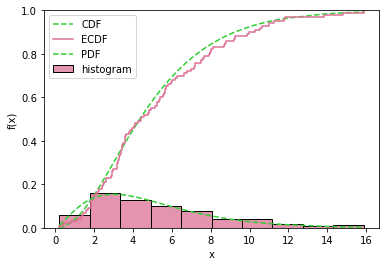

In [1]:
# --------
# Потанин Богдан Станиславович
# Математическая Статистика в Python
# Урок 4. Выборочная функция распределения и гистограмма
# --------

import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform

np.set_printoptions(suppress = True)                    # уберем scientific notation

# --------
# Часть №1. Выборочная функция распределения
# --------

# Сформируем выборку из Хи-квадрат
# распределения с df степенями свободы
np.random.seed(123)                                     # для воспроизводимости результатов, полученных с использованием
                                                        # выборок, необходима установка случайного зерна
n = 100                                                 # переменная, хранящая объем выборки
df = 5                                                  # переменная, хранящая число степеней свободы
x = chi2.rvs(size = n,                                  # объем выборки
             df = df)                                   # число степеней свободы

# Напишем эмпирическую функцию распределения
t = 5
np.mean(x <= t)                                         # эмпирическая функция распределения
                                                        # в точке t
def ecdf(t, x):                                         # функция, считающая эмпирическую функцию
    return np.mean(x <= t)                              # распределения в произвольной точке
ecdf(t, x)                                              # эмпирическая функция распределения в точке t
chi2.cdf(t, df = df)                                    # теоретическая (настоящая) функция распределения в точке t

# Отобразим на одном графике эмпирическую и
# теоретическую (настоящую) функции распределения
# того распределения, из которого была
# получена выборка
x = np.sort(x)                                          # для удобства отсортируем
                                                        # реализации выборки
F_x = chi2.cdf(x, df = df)                              # значение функции распределения в соответствующих точках
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('F(x)')                                      # название верхней оси графика
plt.plot(x, F_x, '--', markersize = 1,                  # график теоретической функции распределения
  label = "CDF", color = "limegreen")
seaborn.ecdfplot(x,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred")
plt.legend()
# Цвета для графиков:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# --------
# Часть №2. Гистограмма (выборочная функция плотности)
# --------
f_x = chi2.pdf(x, df = df)                              # значение функции плотности в соответствующих точках
plt.xlabel('x')                                         # название нижней оси графика
plt.ylabel('f(x)')                                      # название верхней оси графика
plt.plot(x, f_x, '--', markersize = 20,                 # график теоретической функции распределения
  label = "PDF", color = "limegreen")
seaborn.histplot(x, stat = 'density',                   # гистограмма как график выборочной функции плотности
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10)                             # число столбиков в Гистограмме
plt.legend()

# Рассчитаем значение Гистограммы
# в точке t вручную
t = 5                                                   # точка, в которой осуществляется расчет
t_adj = t - min(x)                                      # точка, скорректированная на минимальное значение в выборке
x_adj = x - min(x)                                      # выборка, скорректированная на минимальное значение
bin_n = 10                                              # число столбиков в Гистограмме
bin_w = (max(x) - min(x)) / bin_n                       # ширина столбика
t_w_ratio = (t_adj) / bin_w                             # отношение скорректированной точки к ширине столбика
bin_t = math.floor(t_w_ratio) + 1                       # номер столбика, в котором расположена точка
len(x[(x_adj >= ((bin_t - 1) * bin_w)) &
      (x_adj < (bin_t * bin_w))]) / (n * bin_w)         # значение Гистограммы в точке

In [2]:
# Задания
# 1. Постройте графики гистограммы и выборочной
#    функции распредленеия для распределений:

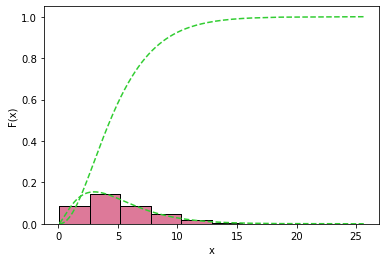

In [3]:
# 1)     Хи-Квадрат с 5-ю степенями свободы
x = chi2.rvs(size = 1000, df = 5)
x = np.sort(x)
f_x = chi2.pdf(x, df = 5)  
F_x = chi2.cdf(x, df = 5)
plt.plot(x, f_x, '--', markersize = 20,label = "PDF", color = "limegreen")
seaborn.histplot(x, stat = 'density', color = "palevioletred",label = "histogram",bins = 10)          
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);

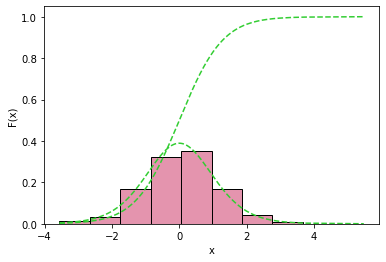

In [4]:
#    2)     Стьюдента с 10-ю степенями свободы 
x = scipy.stats.t.rvs(size = 1000, df = 10) 
x = np.sort(x)
f_x = scipy.stats.t.pdf(x, df = 10)  
F_x = scipy.stats.t.cdf(x, df = 10)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, f_x, '--', markersize = 20,label = "PDF", color = "limegreen")
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);

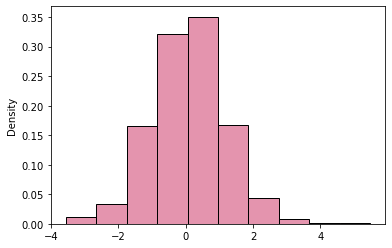

In [5]:
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);

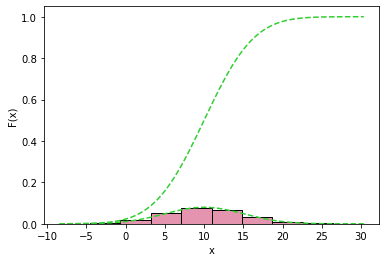

In [6]:
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25
x = norm.rvs(loc=10, scale=5, size=10000)
x = np.sort(x)
f_x = norm.pdf(x,loc=10,scale=5)  
F_x = norm.cdf(x,loc=10,scale=5)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");
plt.plot(x, f_x, '--', markersize = 20,label = "PDF", color = "limegreen")
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);


In [7]:
# 2. В каждом пункте предыдущего задания проверьте,
#    как объем выборки влияет на то, насколько близки
#    окажутся выборочные и истинные характеристики
#    распределения. Сравните выборки объемом
#    в 10, 100, 1000 и 10000 наблюдений. При увеличении
#    объема выборки увеличивайте число столбиков
#    в гистограмме.

выборочные
10
5.0363172030460595
100
5.899417595015339
1000
5.012507634963926
10000
4.9839098015963925
истинные
5
выборочные
10
26.709536587915885
100
7.374620293998481
1000
9.533746804384714
10000
10.168650498758675
истинные
10


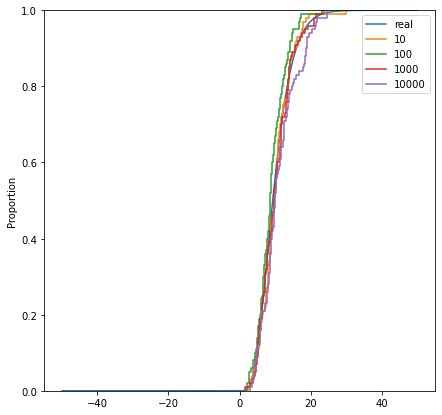

In [8]:
print('выборочные')
for i in (10, 100, 1000, 10000):
    x = chi2.rvs(size = i, df=5)
    print(i)
    print(np.mean(x))
print('истинные')
print(5)
print('выборочные')
for i in (10, 100, 1000, 10000):
    print(i)
    x = chi2.rvs(size = i, df=5)
    print(np.var(x))
print('истинные')
print(10)

x = chi2.rvs(size = 10000, df=10)
plt.figure(figsize=(7,7))
obruch = np.arange(-50, 50, 0.01)
sravn = chi2.cdf(obruch, df=10)
decyat = chi2.rvs(size = 100,df=10)
sto = chi2.rvs(size = 100,df=10)
tisyacha = chi2.rvs(size = 100,df=10)
destisyach = chi2.rvs(size = 100,df=10)
plt.plot(obruch, sravn, label='real')
seaborn.ecdfplot(decyat, label='10')
seaborn.ecdfplot(sto, label='100')
seaborn.ecdfplot(tisyacha, label='1000')
seaborn.ecdfplot(destisyach, label='10000')
plt.legend(loc='upper right')

выборочные
10
-0.9067102751072806
100
-0.08640487757274411
1000
0.001880332620125916
10000
0.008492236924854131
истинные
0
выборочные
10
0.53075598381132
100
0.8552772725671741
1000
1.229360083868251
10000
1.2382984846276948
истинные
1.25


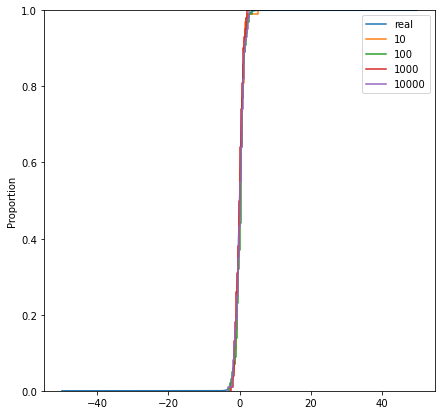

In [9]:
print('выборочные')
for i in (10, 100, 1000, 10000):
    x = scipy.stats.t.rvs(size = i, df=10)
    print(i)
    print(np.mean(x))
print('истинные')
print(0)
print('выборочные')
for i in (10, 100, 1000, 10000):
    print(i)
    x = scipy.stats.t.rvs(size = i, df=10)
    print(np.var(x))
print('истинные')
print(10/8)

x = scipy.stats.t.rvs(size = 10000, df=10)
plt.figure(figsize=(7,7))
obruch = np.arange(-50, 50, 0.01)
sravn = scipy.stats.t.cdf(obruch, df=10)
decyat = scipy.stats.t.rvs(size = 100,df=10)
sto = scipy.stats.t.rvs(size = 100,df=10)
tisyacha = scipy.stats.t.rvs(size = 100,df=10)
destisyach = scipy.stats.t.rvs(size = 100,df=10)
plt.plot(obruch, sravn, label='real')
seaborn.ecdfplot(decyat, label='10')
seaborn.ecdfplot(sto, label='100')
seaborn.ecdfplot(tisyacha, label='1000')
seaborn.ecdfplot(destisyach, label='10000')
plt.legend(loc='upper right')

выборочные
10
9.024028111075081
100
9.880505016846064
1000
10.11332248520121
10000
10.000169475345839
истинные
10
выборочные
10
11.459844339918124
100
21.64690768269284
1000
26.18455720395597
10000
24.960520280620894
истинные
25


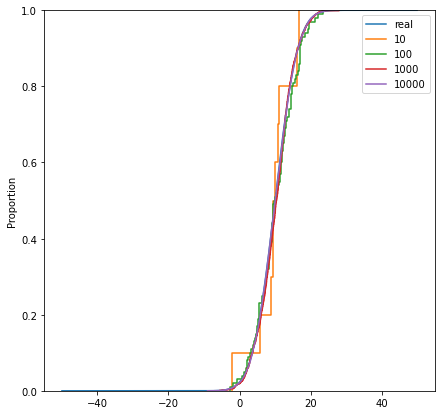

In [10]:
print('выборочные')
for i in (10, 100, 1000, 10000):
    x = norm.rvs(loc=10, scale=5, size=i)
    print(i)
    print(np.mean(x))
print('истинные')
print(10)
print('выборочные')
for i in (10, 100, 1000, 10000):
    print(i)
    x = norm.rvs(loc=10, scale=5, size=i)
    print(np.var(x))
print('истинные')
print(25)

plt.figure(figsize=(7,7))
obruch = np.arange(-50, 50, 0.01)
sravn = norm.cdf(obruch, loc = 10, scale = 5)
decyat = norm.rvs(size = 10, loc = 10, scale = 5)
sto = norm.rvs(size = 100, loc = 10, scale = 5)
tisyacha = norm.rvs(size = 1000, loc = 10, scale = 5)
destisyach = norm.rvs(size = 10000, loc = 10, scale = 5)
plt.plot(obruch, sravn, label='real')
seaborn.ecdfplot(decyat, label='10')
seaborn.ecdfplot(sto, label='100')
seaborn.ecdfplot(tisyacha, label='1000')
seaborn.ecdfplot(destisyach, label='10000')
plt.legend(loc='upper right')

In [11]:
# 3. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

In [12]:
def ecdf(t, x):               
    return np.mean(x <= t)    
x = chi2.rvs(size = 10000, df=5)   
ecdf(5, x)                         

0.5884

In [13]:
# 4. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение гистограммы
#    для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе


In [14]:
def gist(t,x):
    t_adj = t - min(x)                                      # точка, скорректированная на минимальное значение в выборке
    x_adj = x - min(x)                                      # выборка, скорректированная на минимальное значение
    bin_n = 10                                              # число столбиков в Гистограмме
    bin_w = (max(x) - min(x)) / bin_n                       # ширина столбика
    t_w_ratio = (t_adj) / bin_w                             # отношение скорректированной точки к ширине столбика
    bin_t = math.floor(t_w_ratio) + 1                       # номер столбика, в котором расположена точка
    return len(x[(x_adj >= ((bin_t - 1) * bin_w)) & (x_adj < (bin_t * bin_w))]) / (len(x) * bin_w)
y = chi2.rvs(size = 100,                                  
             df = 5)  

gist(3,y) 

0.10068529642587942

In [15]:
# 5. Самостоятельно запрограммируйте функции,
#    позволяющие по выборке строить график:

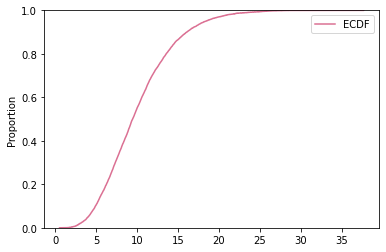

In [16]:
#    1)    Выборочной функции распределения
def emperika(x):
    seaborn.ecdfplot(x,                                     # график эмпирической функции распределения
                 label = "ECDF",
                 color = "palevioletred")
    plt.legend()
y = chi2.rvs(size = 10000,                                  # объем выборки
        df = 10)     
emperika(y)

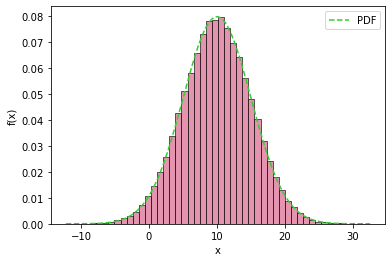

In [17]:
#    2*)   Гистограммы с произвольным
#          числом столбиков

def gisti(x, f_x, bins):
    plt.xlabel('x')                                         
    plt.ylabel('f(x)')                                      
    plt.plot(x, f_x, '--', markersize = 20,             
      label = "PDF", color = "limegreen")                   
    plt.legend()
    return seaborn.histplot(x, stat = 'density',color = "palevioletred",label = "histogram",bins = bins)     
x = norm.rvs(size = 100000, loc = 10, scale = 5)    
x = np.sort(x)  
f_x1 = norm.pdf(x, loc = 10, scale = 5)                               # значение функции плотности в соответствующих точках
gisti(x,f_x1,50) 

In [18]:
# 6. Используя ЗБЧ и несколько выборок из Хи-Квадрат
#    распределения приблизительно рассчитайте:

In [19]:
#    1**)  Математическое ожидание выборочной функции
#          распределения в точке 5
x = chi2.rvs(size = 1000,                                 
             df = 5)  
x1 = chi2.rvs(size = 1000,                                 
             df = 5) 
x2 = chi2.rvs(size = 1000,                                 
             df = 5) 
x3 = chi2.rvs(size = 1000,                                 
             df = 5) 
x4 = chi2.rvs(size = 1000,                                 
             df = 5)
x5 = chi2.rvs(size = 1000,                                 
             df = 5) 
x6 = chi2.rvs(size = 1000,                                 
             df = 5)  

(ecdf(5, x)+ecdf(5, x1)+ecdf(5, x2)+ecdf(5, x3)+ecdf(5, x4)+ecdf(5, x5)+ecdf(5, x6))/7

0.5805714285714286

In [20]:
#    2**)  Дисперсию выборочной функции распределения
#          в точке 5

In [21]:
def ecdfvar(t, x):               
    return np.var(x <= t)    
x = chi2.rvs(size = 10000, df=5)   
ecdf(5, x)       

0.581

In [22]:
x = chi2.rvs(size = 1000,                                 
             df = 5)  
x1 = chi2.rvs(size = 1000,                                 
             df = 5) 
x2 = chi2.rvs(size = 1000,                                 
             df = 5) 
x3 = chi2.rvs(size = 1000,                                 
             df = 5) 
x4 = chi2.rvs(size = 1000,                                 
             df = 5)
x5 = chi2.rvs(size = 1000,                                 
             df = 5) 
x6 = chi2.rvs(size = 1000,                                 
             df = 5)  
s = []
s.append(ecdfvar(5,x))
s.append(ecdfvar(5,x1))
s.append(ecdfvar(5,x2))
s.append(ecdfvar(5,x3))
s.append(ecdfvar(5,x4))
s.append(ecdfvar(5,x5))
s.append(ecdfvar(5,x6))
print(np.mean(s),s)

0.242395 [0.24207900000000007, 0.2413510000000001, 0.242604, 0.24116400000000004, 0.242256, 0.241536, 0.24577499999999997]
